# Kunst maken met games
## Team - Bob Ross

Voor deze opdracht gaan we pandas, bokeh, seaborn, sklearn en matplotlib gebruiken. Pandas gebruiken we voor de datasets zodat we goed de data kunnen beheren. Bokeh gebruiken we voor de visualisatie. Seaborn gebruiken we om heatmaps te maken. Sklearn gebruiken we voor het maken van de prediction. Matplotlib gebruiken we voor de diagrammen voor de prediction. Hier importeren we de libraries.

In [20]:
import pandas as pd
from bokeh.io import output_notebook, show
from bokeh.layouts import row, gridplot, widgetbox
from bokeh.charts import Histogram, BoxPlot, Scatter, Line, Bar
from bokeh.plotting import figure, ColumnDataSource
from bokeh.models import CustomJS, Slider
from bokeh.charts import defaults, vplot, hplot, show, output_file
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn import linear_model
%matplotlib inline
output_notebook()

Loading BokehJS ...

# Data Mungling
Hier lezen we de datasets in en voegen de videogamesale en metacritic datasets samen

In [21]:
game = pd.read_csv("gamesales.csv")
meta = pd.read_csv("metacritic.csv")
score = game.merge(meta, left_on="Name", right_on="gameName", how="left", copy="False")
score = score.dropna(how="any")
score = score.drop('Rank', 1)
score.sort_values(by="Global_Sales", inplace=True, ascending=False)
score.reset_index(drop=True, inplace=True)
y2015 = pd.read_csv("2015.csv")

Hier laten we zien dat de datasets zijn ingeladen

In [22]:
game.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [23]:
meta.head()

,reviewScorePro,gameName,reviewScoreUser
0,98,Grand Theft Auto IV,7.9
1,97,Grand Theft Auto V,8.1
2,96,BioShock,8.9
3,96,The Orange Box,8.9
4,96,Mass Effect 2,8.9


In [24]:
y2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


Hier laten we zien dat de dataset goed is samengevoegd

In [25]:
score.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,reviewScorePro,gameName,reviewScoreUser
0,Kinect Adventures!,X360,2010.0,Misc,Microsoft Game Studios,14.97,4.94,0.24,1.67,21.82,61.0,Kinect Adventures!,6.3
1,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40,97.0,Grand Theft Auto V,8.1
2,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38,97.0,Grand Theft Auto V,8.1
3,Call of Duty: Modern Warfare 3,X360,2011.0,Shooter,Activision,9.03,4.28,0.13,1.32,14.76,88.0,Call of Duty: Modern Warfare 3,3.4
4,Call of Duty: Black Ops,X360,2010.0,Shooter,Activision,9.67,3.73,0.11,1.13,14.64,87.0,Call of Duty: Black Ops,6.3


Hier bekijken we wat de types van de kolommen zijn

In [26]:
score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2575 entries, 0 to 2574
Data columns (total 13 columns):
Name               2575 non-null object
Platform           2575 non-null object
Year               2575 non-null float64
Genre              2575 non-null object
Publisher          2575 non-null object
NA_Sales           2575 non-null float64
EU_Sales           2575 non-null float64
JP_Sales           2575 non-null float64
Other_Sales        2575 non-null float64
Global_Sales       2575 non-null float64
reviewScorePro     2575 non-null float64
gameName           2575 non-null object
reviewScoreUser    2575 non-null float64
dtypes: float64(8), object(5)
memory usage: 261.6+ KB


# Statistische analyse
Hier laten we zien wat de sales zijn per platform zijn

In [27]:
b = Bar(score, 'Platform', values='Global_Sales', title="Sales per platform", legend=False, color="Platform")
show(b)

Hier laten we zien wat de sales zijn per genre zijn

In [28]:
b2 = Bar(score, 'Genre', values='Global_Sales', title="Sales per genre", legend=False, color="Genre")
show(b2)

Hier laten we de verschillen tussen de gemiddelde review score van critics en users is op basis van genre en platform

In [29]:
b3 = Bar(score, 'Genre', values='reviewScorePro', agg='mean', title="Critic review per genre", legend=False, color="Genre")
b4 = Bar(score, 'Genre', values='reviewScoreUser', agg='mean', title="User review per genre", legend=False, color="Genre")
b5 = Bar(score, 'Platform', values='reviewScorePro', agg='mean', title="Critic review per platform", legend=False, color="Platform")
b6 = Bar(score, 'Platform', values='reviewScoreUser', agg='mean', title="User review per platform", legend=False, color="Platform")
row1 = [b3, b4, b5, b6]
layout = gridplot([[b3, b4],[b5, b6]])
show(layout)

Hier maken we twee heatmaps aan die laten zien in welke regio de hoogste worldhappiness is en in welke regio de meeste games worden verkocht. Zo kun je zien dat in de gebieden waar meer games worden verkocht, meer happiness is.

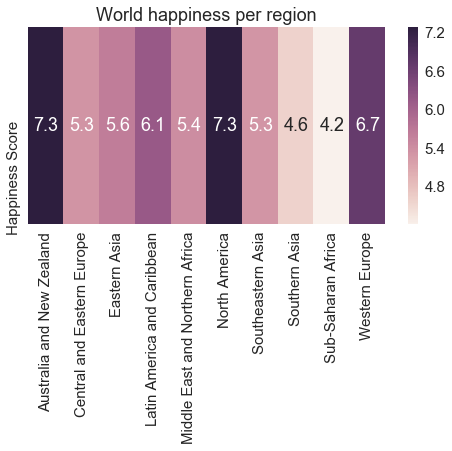

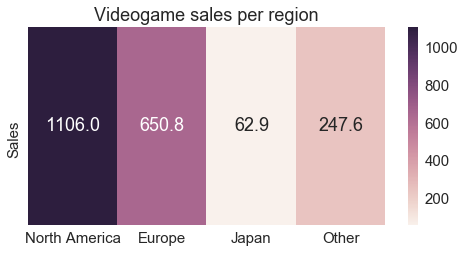

In [30]:
happiness2015 = pd.DataFrame(y2015["Happiness Score"].groupby(y2015.Region).mean())
happiness2015.index.name = None
happiness2015 = happiness2015.transpose()
sales = pd.DataFrame([score.NA_Sales.sum(), score.EU_Sales.sum(), score.JP_Sales.sum(), score.Other_Sales.sum()], index=["North America", "Europe", "Japan", "Other"])
sales.rename(columns=dict(zip([0], ["Sales"])), inplace=True)
sales = sales.transpose()
plt.figure(figsize=(8,8))
sns.set(font_scale=1.5)
plt.subplot(211)
sns.heatmap(happiness2015.loc[:, 'Australia and New Zealand':'Western Europe'], annot=True, fmt = '.1f')
plt.title("World happiness per region")
plt.figure(figsize=(8,8))
sns.set(font_scale=1.5)
plt.subplot(212)
sns.heatmap(sales.loc[:,'North America':'Other'], annot=True, fmt = '.1f')
plt.title("Videogame sales per region")
plt.show()
plt.show()

# Machine learning
## Supervised
Hier maken we de formule aan voor de prediction van hoeveel sales er gaan komen in een jaar

In [31]:
globalsales = pd.DataFrame(score.Global_Sales.groupby(score.Year).sum())
globalsales.index.name = None
globalsales = globalsales.drop(globalsales.index[[-1, -2, -3]])
score['Year'] = score['Year'].astype(int)
X = pd.DataFrame(score[['Year']])
X.drop_duplicates("Year", inplace=True)
X.sort_values(by="Year", inplace=True, ascending=True)
X.reset_index(drop=True, inplace=True)
X = X.drop(X.index[[-1, -2, -3]])
y = globalsales["Global_Sales"]
lm = linear_model.LinearRegression()
lm.fit(X, y)
constante = lm.intercept_
jaarfactor = lm.coef_[0]
print('De formule is: Aantal sales = {0:.1f} + {1:.1f} * Jaartal '.format(constante,jaarfactor))

De formule is: Aantal sales = -17210.5 + 8.6 * Jaartal 


Hier plotten we een grafiek doormiddel van de gemaakte formule

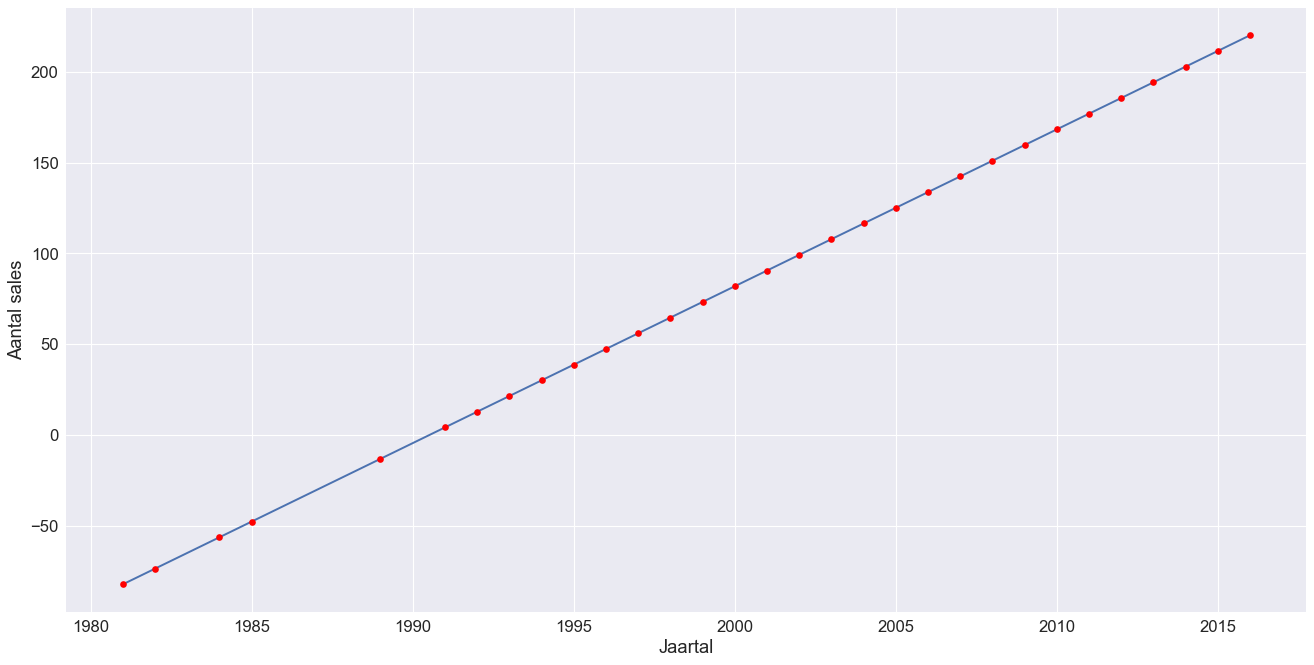

In [32]:
jaren = pd.DataFrame(score["Year"])
jaren.sort_values(by="Year", inplace=True, ascending=True)
jaren = jaren.Year.drop_duplicates()
jaren.reset_index(drop=True, inplace=True)
pX = pd.DataFrame(jaren)
voorspelling = lm.predict(pX)
plt.figure(figsize=(20,10), dpi=80)
plt.xlabel('Jaartal')
plt.ylabel("Aantal sales")
plt.plot(pX['Year'],voorspelling,
        marker='.', markerfacecolor='red', markersize=12)

Hier maken we dezelfde grafiek en formule maar dan met behulp van seaborn

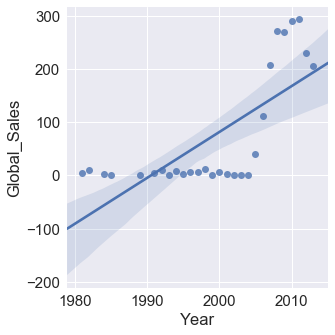

In [33]:
pred = pd.merge(X, globalsales, right_index=True, left_on='Year')
sns.lmplot(x='Year', y='Global_Sales', data=pred)

Hier laten we een prediction wat de sales gaan worden in de toekomst zien doormiddel van de gemaakte formule 

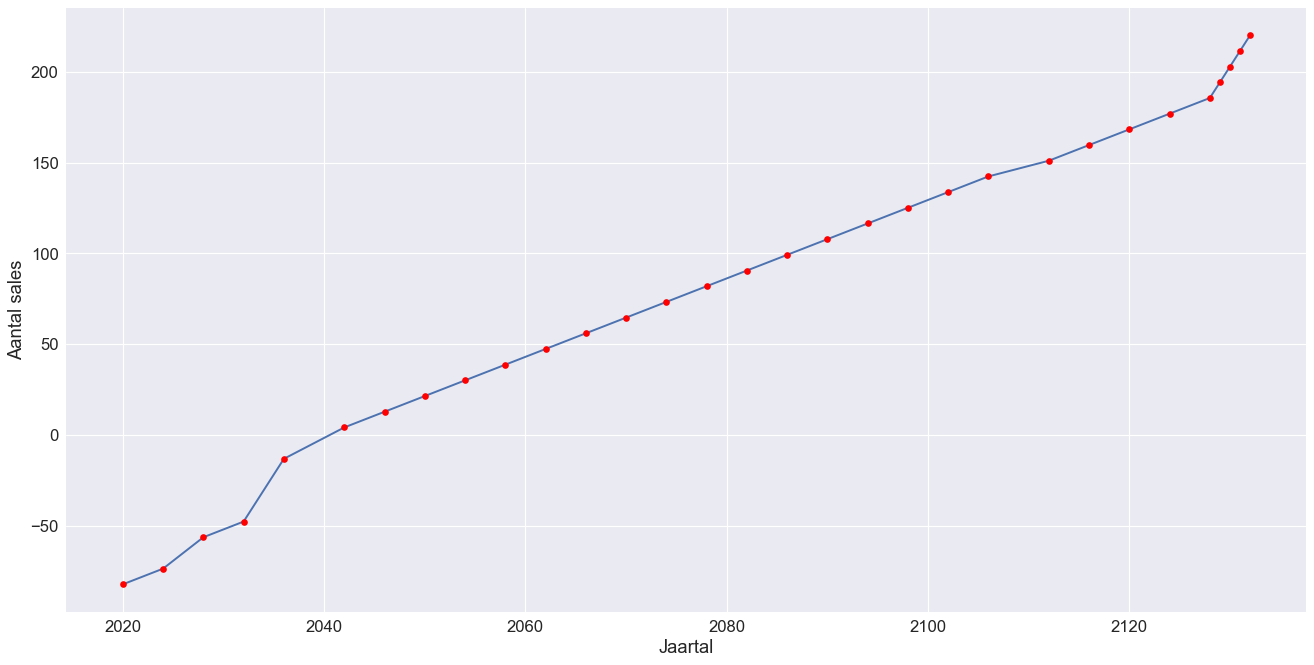

In [34]:
jaartallen = {'Jaar' : [ 2020, 2024, 2028, 2032, 2036, 2042, 2046, 2050, 2054, 2058, 2062, 2066, 2070, 2074, 2078, 2082, 2086, 2090, 2094, 2098, 2102, 2106, 2112, 2116, 2120, 2124, 2128, 2129, 2130, 2131, 2132]}
jaartallen = pd.DataFrame(jaartallen)
plt.figure(figsize=(20,10), dpi=80)
plt.xlabel('Jaartal')
plt.ylabel("Aantal sales")
plt.plot(jaartallen["Jaar"],voorspelling,
        marker='.', markerfacecolor='red', markersize=12)

## Unsupervised
Hier maken we een veld aan met vlakken op basis van de som van de gamesales op basis van het jaar

In [35]:
X = pd.DataFrame(score.Global_Sales.groupby(score.Year).sum())
X.index.name = None
X.drop(globalsales.index[[-1, -2, -3]])
y = pd.DataFrame(score["Year"])
y.sort_values(by="Year", inplace=True, ascending=True)
y = y.Year.drop_duplicates()
y.reset_index(drop=True, inplace=True)
X
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

Hier kun je een hoeveelheid sales invullen en dan laat het systeem weten in welk jaar die hoeveelheid sales het meest valt

In [36]:
print(neigh.predict([[0.28]]))

[2016]


# Visualisatie en simulatie
Hier maken we twee datasets aan met de gemiddelde reviewscore van critics en users aan op basis van het jaartal

In [37]:
yearscore = pd.DataFrame(score["reviewScorePro"].groupby(score.Year).mean())
yearscore.index.name = None
years = yearscore.index.values.tolist()
yearscoreuser = pd.DataFrame(score["reviewScoreUser"].groupby(score.Year).mean())
yearscoreuser.index.name = None
yearscoreuser.loc[:,'reviewScoreUser'] *= 10

Hier maken we een grafiek aan met de gemiddelde userscore en de gemiddelde criticscore per jaar(criticscore in het rood en userscore in het blauw). Ook hebben we twee sliders om aan te geven wat het minimale jaartal en het maximale jaartal moet zijn.

In [38]:
plot = figure(plot_width=400, plot_height=400, title="Reviews per jaar")
plot.xaxis.axis_label = "Jaar"
plot.yaxis.axis_label = "Gemiddelde score"

plot.line(x=years, y=yearscore['reviewScorePro'])
plot.line(x=years, y=yearscoreuser['reviewScoreUser'], color="red")

callback = CustomJS(args=dict(x_range=plot.x_range), code="""
var start = cb_obj.get("value");
x_range.set("start", start);
""")
callback2 = CustomJS(args=dict(x_range=plot.x_range), code="""
var start = cb_obj.get("value");
x_range.set("end", start);
""")

min_slider = Slider(start=years[0], end=years[len(years)-1], title='Min jaar', callback=callback)
max_slider = Slider(start=years[0], end=years[len(years)-1], title='Max jaar', callback=callback2)


layout = row(
    plot,
    widgetbox(min_slider, max_slider),
)

show(layout)

©Team - Bob Ross - Rick Schoeman | Roy Hendriks | Nick Schouten